## Deutsch Algoritması

Deutsch algoritması, klasik bir bitin durumunu tersine çeviren ya da aynı bırakan bir fonksiyonun "sabitlik" özelliğini kullanarak çalışır. Kuantum bilgisayarlarla, bu algoritma sadece bir sorgulama ile bu sabitliği belirleyebilir.

Bu algoritma iki kubit kullanır. Klasik bir algoritma, bu fonksiyonun değerlerini iki ayrı sorgu yaparak belirlemek zorunda olabilirken, Deutsch algoritması sadece bir sorgu yaparak bu fonksiyonun sabit olup olmadığını belirleyebilir. Bu özellik, klasik bilgisayarların ötesine geçerek kuantum hesaplama gücünün avantajlarını gösterir.

Kuantum devreleri, giriş kubitlerini hazırlar, bir sorgu gerçekleştirir ve ardından ölçüm yaparak sonucu elde eder. Bu süreçte, süperpozisyon ve kuantum bit fliplemesi gibi özelliklerden yararlanarak hesaplama gerçekleştirilir. Bu, klasik bilgisayarlarla kıyaslandığında kuantum bilgisayarların belirli durumlarda üstünlük sağlayabileceği bir alandır.

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [2]:
circuit = QuantumCircuit(2,1)

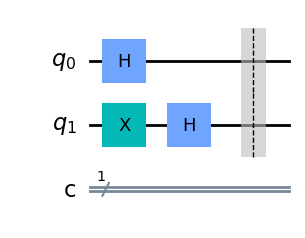

In [3]:
circuit.h(0) # Birinci kubite Hadamard kapısı uygulanır, bu kubiti süperpozisyona sokar.
circuit.x(1) # İkinci kubite X (NOT) kapısı uygulanır, bu kubiti tersine çevirir.
circuit.h(1) # İkinci kubite Hadamard kapısı daha uygulanır, kubit süperpozisyona sokulur.
circuit.barrier()
circuit.draw(output='mpl')

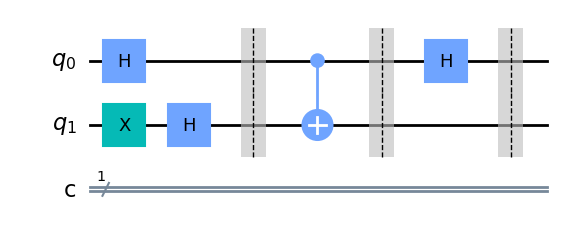

In [4]:
circuit.cx(0,1) # Birinci kubit kontrol kubiti olarak, ikinci kubit hedef kubiti olarak kullanılır. Eğer birinci kubit 1 ise, ikinci kubit ters çevrilir.

circuit.barrier()
circuit.h(0) # Birinci kubite bir Hadamard kapısı daha uygulanır, süperpozisyon durumu pekiştirilir.

circuit.barrier()
circuit.draw(output='mpl')

In [5]:
# Deutsch algoritmasının bir bölümünü oluşturur ve sabitlik testini gerçekleştirir.

circuit.measure(0,0)

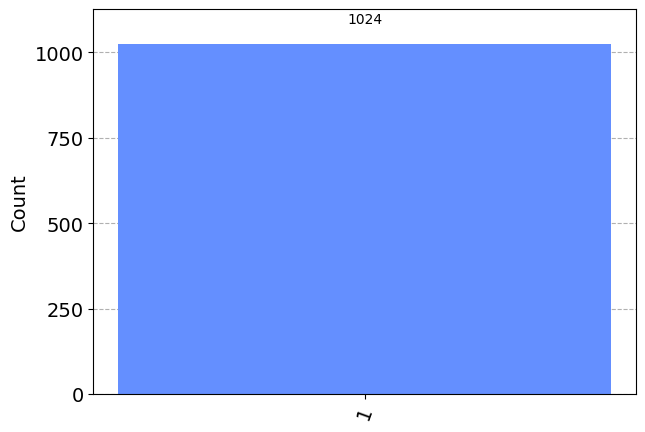

In [6]:
simulator= Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator,shots=1024).result()
counts = result.get_counts(circuit)

plot_histogram([counts])
